# 2020.06.18_corpus_colossus ( no progress here)

-----

* Corpus colossus idea



### Version Info
* madmax:  `fc7ab4d` `starting_furyroad`
* research: `4355708` `starting_furyroad`
#### 2020.06.19  I renanmed furyroad to be OnlineBooster and renamed the CorpusColussus package as furyroad

---
## History

#### 2020.06.12_furyroad

* Testing disjoint 1 day returns as prediction targets
* sequential boosting with furyroad


#### 2020.06.10_refactored_rnns
refactored the rnns to support single step updates. Will test these

#### 2020.06.08_baselines_again
Since I am a total fucking retard and I delete all important shit - I'm going to waste anotehr day regenerating this fucking shit

Recap of all models to date
*   basic online model with rolling window (no technical features)
*  disjoint returns
*   online learning with Q and P-omega weights
* boosting / sequential residualization


#### 2020.06.04_recap
Recap of all models to date
*   basic online model with rolling window (no technical features)
*  disjoint returns
*   online learning with Q and P-omega weights
* boosting / sequential residualization



In [4]:
# preamble
%alias_magic  nbagg matplotlib -p nbagg
%alias_magic  inline matplotlib -p inline
%load_ext memory_profiler
%load_ext line_profiler

from pylab import *
from madmax.api import *
mx = mx.reload()
mxtr = mxtr.reload()
plt.style.use('seaborn-whitegrid')

###################################################################
# Interactive configuration
# When running a config grid this will throw a FrozenException
# and the grid Config will be used
###################################################################
try:
    Config = mx.Configuration(
        name = 'etf_technical/2020.06.12_furyroad/',
        mode = 'interactive',
        hps = mx.HPSet(
            start='20070101',
            end='20200501',
            INTS_PER_DAY = 13,                
        ),
        code = '2020.06.12_furyroad.ipynb',
        tb_port=6006,
    )
    disp('Running interactive configuration ', h=2)
except mx.Configuration.FrozenException:
    if Config.mode != 'grid':
        raise RuntimeError('An unexpected configruation encountered')
    disp('Running a grid configuration ', h=2)

device = 'cuda'
dtype = tr.float32
Config.start()



# to run run a grid of hyperparameters ...
####################################
# # hyperparameters
# mx.Config.hps = fr.HPSet(
# )
# mx.Config.code = ''
# # configs = []
# # for obs_weight in ['no_weight', 'dollar_weight', 'log_weight']:
# #     cfg = fr.Config.clone()
# #     cf
# #     cfg.hps = cfg.hps.clone( obs_weight=obs_weight )
# #     cfg.freeze()
# #     display_html( cfg )
# #     configs.append( cfg )
# # notebook = fr.Config.run_grid( configs, outfile=fr.Config.uri+'/../cadre_price_index.20200302 - weight_grid_results.ipynb', n_jobs=None )

Created `%nbagg` as an alias for `%matplotlib nbagg`.
Created `%inline` as an alias for `%matplotlib inline`.
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


<h1> Config etf_technical/2020.06.12_furyroad/ </h1>
<b> hash</b>: none </h4>
<b> mode </b>: interactive
<b> frozen </b>: False
<b> uri </b>: /home/fj/experiments/etf_technical/2020.06.12_furyroad/none
<b> tb_port </b>: 6006
<h3> Hyperparameters </h3>
HPSet(
		INTS_PER_DAY=13,
		end='20200501',
		start='20070101',
	)<h3> Code </h3>
<b> format </b>: .ipynb
<b> code </b> : /local/cloud/code/research/etf_technical/2020.06.12_furyroad.ipynb

## interactive global hyperparameters

In [6]:
# global  configruation
#######
if Config.mode == 'grid':
    raise Config.FrozenException( 'running grid configruation - skipping')

hps = Config.hps

hps.universe = mx.HPSet(
    start = '20100101',
    end='20200401',
    min_count=2000,
    min_dollar_vol=1e5
)


hps.feature_set = mx.HPSet(
    unadj_prices=[
        'open_unadj_30min', 'high_unadj_30min', 'low_unadj_30min', 'close_unadj_30min', 'mid_unadj_30min',
        'log_open_unadj_30min', 'log_close_unadj_30min',
    ],
    adj_prices=[
        'open_adj_30min', 'high_adj_30min', 'low_adj_30min', 'close_adj_30min',
        'mid_adj_30min', 'mid_adj_0D.12h.vwap', 'mid_adj_2D.12h.vwap', 'mid_adj_5D.vwap',
        'open_adj_0D.12h', 'high_adj_0D.12h', 'low_adj_0D.12h',
        'open_adj_2D.12h', 'high_adj_2D.12h', 'low_adj_2D.12h',
        'open_adj_5D', 'high_adj_5D', 'low_adj_5D',
    ],
    rel_prices=[
        'rel_price_260', 'rel_price_780', 'rel_price_3276',
    ],
    volumes=[
        'volume_unadj_30min', 'dollar_volume_unadj_30min', 'avg_dollar_volume',
    ],
    log_volumes=[
        'log10_dollar_volume_30min', 'log10_dollar_volume_30min_resid',
    ],
    rel_volume=[
        'rel_dollar_volume_260', 'rel_dollar_volume_780',
        'rel_dollar_volume_3276',
    ],
    calendar=[
        'timeofday', 'cos1_timeofday', 'cos2_timeofday', 'cos4_timeofday',
        'dayofweek', 'cos1_dayofweek', 'cos2_dayofweek',
        'weekofmonth', 'cos1_weekofmonth', 'cos2_weekofmonth',
        'monthofquarter', 'cos1_monthofquarter', 'cos2_monthofquarter',
        'quarterofyear', 'cos1_quarterofyear', 'cos2_quarterofyear',
    ],
    lagging=[
        'lagrtn_adj_30min', 'lagrtn_adj_1hr', 'lagrtn_adj_1day',
        'lagrtn_adj_30min_resid',
    ],
    mkt=[
        'mkt_lagrtn_30min',
        'mkt_lagrtn_30min_260.rw_sd', 'mkt_lagrtn_30min_780.rw_sd', 'mkt_lagrtn_30min_3276.rw_sd',
    ],
    vol=[
        'lagrtn_adj_30min_260.rw_sd', 'lagrtn_adj_30min_780.rw_sd', 'lagrtn_adj_30min_3276.rw_sd',
        'lagrtn_adj_30min_resid_260.rw_sd', 'lagrtn_adj_30min_resid_780.rw_sd', 'lagrtn_adj_30min_resid_3276.rw_sd',
    ],
    zscores=[
        'lagrtn_adj_30min_260.rw_zscore', 'lagrtn_adj_30min_780.rw_zscore', 'lagrtn_adj_30min_3276.rw_zscore',
        'lagrtn_adj_30min_resid_260.rw_zscore', 'lagrtn_adj_30min_resid_780.rw_zscore',
        'lagrtn_adj_30min_resid_3276.rw_zscore',
    ],
    betas=[
        'lagrtn_adj_30min_1170.ew_beta', 'lagrtn_adj_30min_2340.ew_beta',
        'lagrtn_adj_30min_3276.ew_beta', 'lagrtn_adj_30min_6500.ew_beta',
    ],
    afacs=[ 'bw_afac_30min', 'fw_afac_30min' ],
    technical=[
        'true_range_30min', 'true_range_0D.12h', 'true_range_2D.12h', 'true_range_5D',
        'direction_30min', 'direction_0D.12h', 'direction_2D.12h', 'direction_5D',
        'delta_rtn_30min', 'delta_rtn_0D.12h', 'delta_rtn_2D.12h', 'delta_rtn_5D',
        'ttp_high_adj_0D.12h', 'ttp_high_adj_2D.12h', 'ttp_high_adj_5D',
        'ttp_low_adj_0D.12h', 'ttp_low_adj_2D.12h', 'ttp_low_adj_5D',    
    ],    
    # features in teh daily dataset
    unadj_prices_daily=['open_unadj_30min_13.rw_mean'],
    lagging_daily=['lagrtn_adj_1day', 'lagrtn_adj_30min_resid_13.rw_mean',],
    mkt_daily=[ 'mkt_lagrtn_1day',  'mkt_lagrtn_30min_260.rw_sd', 'mkt_lagrtn_30min_780.rw_sd', 'mkt_lagrtn_30min_3276.rw_sd',],
    volumes_daily=['volume_unadj_30min_13.rw_mean', 'dollar_volume_unadj_30min_13.rw_mean', ],
    log_volumes_daily=[ 'log10_dollar_volume_30min_13.rw_mean', 'log10_dollar_volume_30min_resid_13.rw_mean'],
    afacs_daily=[ 'bw_afac_30min_13.rw_mean', 'fw_afac_30min_13.rw_mean', ],
)

hps.leading_rtns = [
    'leadrtn_adj_30min', 'leadrtn_adj_1hr', 'leadrtn_adj_1day',
    'mkt_leadrtn_30min', 'mkt_leadrtn_1day',
    'leadrtn_adj_30min_disjoint.1', 'leadrtn_adj_30min_disjoint.2', 'leadrtn_adj_30min_disjoint.3',
]

hps.leading_rtns_daily = [
  'leadrtn_adj_1day', 'mkt_leadrtn_1day', 'leadrtn_adj_1day_disjoint_30min', 
]

hps.weights = ['valid_30min', 'weight', ]  


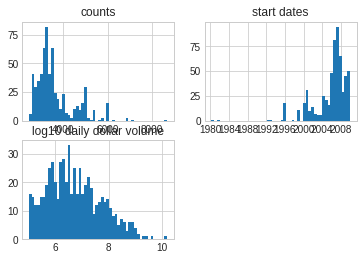

In [7]:
# identify the universe of ETFS
#############################################################
%inline
from research.etf_technical import etf_data_apr2020 as etfd; reload( etfd )

etf_stats = etfd.compute_etf_stats()
etf_stats = etf_stats[etf_stats.vendor=='kibot']
orig_len = len( etf_stats )
# drop etfs without enough history
etf_stats = etf_stats[(etf_stats['start'] <= hps.universe.start ) 
                      & (etf_stats['end'] > hps.universe.end ) 
                      & (etf_stats['n'] >= hps.universe.min_count)
                      & (etf_stats['daily_dollar_volume_adj'] >= hps.universe.min_dollar_vol ) ]

disp( 'after filtering', len( etf_stats ), 'symbols out of original ' ,orig_len )

etf_stats = (etf_stats
             .merge( etfd.all_etfs, how='left', left_on='symbol', right_on='Symbol' )
             .drop( columns=['Symbol', 'ETP Name', 'Leveraged / Inverse' ])
             .rename( columns={'Asset Class':'asset_class', 'Description':'name'} )
             .fillna( 'Not Specified')             
             .set_index('symbol')
            )
disp( etf_stats.groupby('asset_class').name.count() )

ax = subplot( 2,2, 1 )
etf_stats.n.hist(ax=ax, bins=50)
ax.set_title( 'counts')

ax = subplot( 2,2, 2 )
etf_stats.start.hist(ax=ax, bins=50)
ax.set_title( 'start dates')

ax = subplot( 2,2, 3 )
etf_stats.daily_dollar_volume_adj.log10().hist(ax=ax, bins=50)
ax.set_title( 'log10 daily dollar volume')

# this is the universe we will work with. 
# HERO has a massive returns spike in 2015.11.09 - which throws off residualization quite a bit.
hps.universe.symbols = sorted( etf_stats.index.values )


In [8]:
# build up the data and features
#############################################
%inline
from research.etf_technical import etf_data_apr2020 as etfd; reload( etfd )
from research.etf_technical import etf_technical_20200517 as etfrc; reload( etfrc )

# fetch the data as a dataarray
builder = etfd.BuildDataWithAfacs( symbols=hps.universe.symbols, mkt_only=True, start=hps.start ,).set( memoize=True )
builder.data = None
disp( 'builder BuildDataWithAfacs_7f79ef4bf  expected got', builder.hash() )
da = builder(  )
df = builder.output_meta

# hyperparams related to computing returns and residuals
hps.returns_hps = mx.HPSet(    
    price_windows=[ 24*1, 24*5, 24*10],
    beta_halflifes=[13 * 90, 13 * 180, 13 * 252, 13*500],
    dollar_volume_window=13*180,
    ema_halflifes=[20 * 13, 60 * 13, 252 * 13],
    resid_halflife=13,
    
)
# compute log-returns, log-dollar-volume, betas, residual returns and clean up the data
rtn_computer = etfrc.compute_returns_and_betas( 
    start=hps.start, end=None,     
    dollar_volume_window=hps.returns_hps.dollar_volume_window, 
    price_windows = hps.returns_hps.price_windows,
    beta_halflifes=hps.returns_hps.beta_halflifes, 
    resid_halflife=None,    
) 
rtn_computer.data = builder
disp( 'expected compute_returns_and_betas_ea966833a got', rtn_computer.hash(), h=4, color='teal' )

# add relative price and relative volume features
rel_price_and_vols = etfrc.add_relative_price_and_volumes( emas=hps.returns_hps.ema_halflifes )
rel_price_and_vols.data = rtn_computer
disp( 'expected add_relative_price_and_volumes_a65da371a got', rel_price_and_vols.hash(), h=4, color='teal' )

# add volatility and calendar features
add_vols = etfrc.add_volatilities( emas=hps.returns_hps.ema_halflifes )
add_vols.data = rel_price_and_vols
disp( 'expected add_volatilities_77ca914f0 got', add_vols.hash(), h=4, color='teal' )

# add disjoint returns
disjoint_returns= etfrc.add_dijoint_returns( lags=(1, 2, 3) )
disjoint_returns.data = add_vols
disjoint_returns.features = ['leadrtn_adj_30min', 'leadrtn_adj_1hr', 'leadrtn_adj_1day', 'lagrtn_adj_30min' ]
disp( 'expected add_dijoint_returns_361e1f0b0 got', disjoint_returns.hash(), h=4, color='teal' )
da = disjoint_returns(   )


# build daily data
daily_data = etfrc.build_daily_data( timeofday=dt.time(16,) ).set(memoize=True)
daily_data.data = disjoint_returns
daily_data.features = ['volume_unadj_30min', 'dollar_volume_unadj_30min', 'lagrtn_adj_30min_resid', 'bw_afac_30min', 'fw_afac_30min', 'open_unadj_30min',  
                       'log10_dollar_volume_30min', 'log10_dollar_volume_30min_resid' ]
disp( 'expected build_daily_data_46a83a0b7 got', daily_data.hash(), h=4, color='teal' )
dda = daily_data()

# FuryRoad_7447511c0
## Regenerating the configuration of FuryRoad_f08613a5a from scratch as a baseline 

,,n,finite_frac,tilt,pmSR,ic,r2,tstat,DK_60,ac_1,ac_2,ac_13
returns,lag,,,,,,,,,,,
leadrtn_adj_1day,NaN,1688976,0.918845,0.000088,0.885351,0.009490,0.000090,11.810688,3.947499,0.655319,0.655666,0.620393
leadrtn_adj_1day_disjoint_30min,NaN,1688976,0.918515,0.000088,0.803251,0.009184,0.000084,11.427844,3.202581,0.655319,0.655666,0.620393


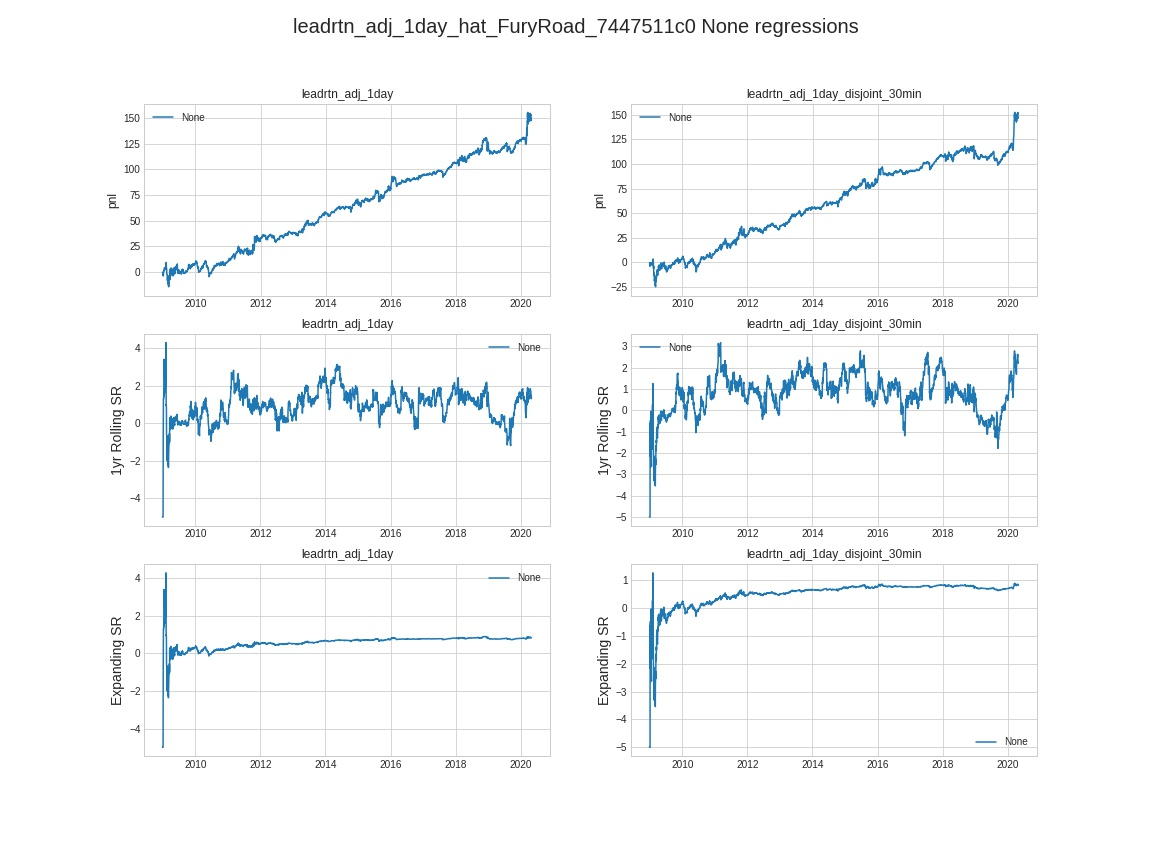

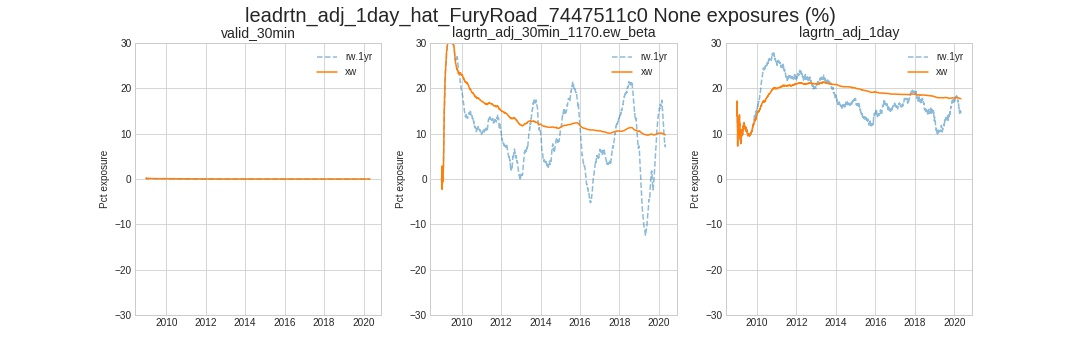

,0
leadrtn_adj_1day_hat_FuryRoad_7447511c0,fcst_0


,fcst_0
fcst_0,1.0


,ac_1,ac_2
x,fcst_0,fcst_0
y,,
fcst_0,0.635299,0.635824


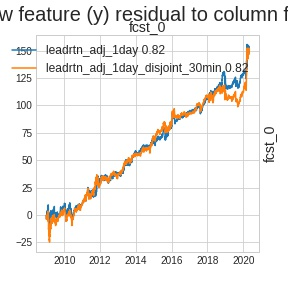

,ac_1,ac_2
x,fcst_0,fcst_0
y,,
fcst_0,0.635299,0.635824


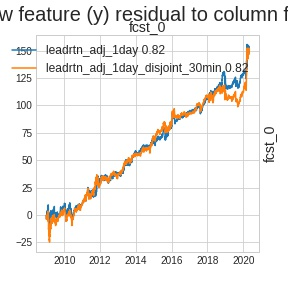

{'fcst_corrs':         fcst_0
 fcst_0     1.0,
 'static_osrs': x                                         fcst_0
 y      tgt                                      
 fcst_0 leadrtn_adj_1day                 0.822051
        leadrtn_adj_1day_disjoint_30min  0.815922,
 'static_autocorrs':             ac_1      ac_2
 x         fcst_0    fcst_0
 y                         
 fcst_0  0.635299  0.635824,
 'static_opnl': <IPython.core.display.Image object>,
 'roll_osrs': x                                         fcst_0
 y      tgt                                      
 fcst_0 leadrtn_adj_1day                 0.822051
        leadrtn_adj_1day_disjoint_30min  0.815922,
 'roll_opnl': <IPython.core.display.Image object>,
 'roll_autocorrs':             ac_1      ac_2
 x         fcst_0    fcst_0
 y                         
 fcst_0  0.635299  0.635824}

In [10]:
#   FuryRoad_7447511c0
####################################################################################
%inline

BASELINE_NAME = 'FuryRoad_7447511c0'
PREV_BASELINE = None
BASELINE_NOTES = 'furyroad with polyak averaging in the boosters (redo FuryRoad_f08613a5a) '
if PREV_BASELINE and BASELINE_NOTES:
    BASELINE_NOTES += f' (follows {PREV_BASELINE}) '
make_baseline = True

disp( BASELINE_NAME, h=1 )
disp( BASELINE_NOTES, h=3 )    

# set the input data
data = daily_data 

phps = mx.HPSet(
    # stuff related to pre and post processing
    start=hps.start,
    end=hps.end,  #
    # related to preprocessing
    preprocess=mx.HPSet(
        symbol=None,
        zscore_target=False, #zscore returns
        winsorize_target=False, #winsorize returns
        winsorize_features=None, # winsorize features
        demean_features=False,
        normalize_features=False,
        winsorize_weight=None, #winsorizes the learning weight (not the regression weight)
    ),        
    # hps related to profiling
    profiling=mx.HPSet(
        xsw=False,
        xsz=False,
        clip=None,
        exposures=(
            ['valid_30min', 'lagrtn_adj_30min_1170.ew_beta', 'lagrtn_adj_1day']         
        ),
        targets=['leadrtn_adj_1day', 'leadrtn_adj_1day_disjoint_30min' ],
        weight='valid_30min',
        
    ),
    # the feature sets
    features=sorted( set(
        []
        + ['open_unadj_30min_13.rw_mean', 'log_open_unadj_30min', 'open_unadj_30min' ]
        + hps.feature_set.lagging_daily
        + hps.feature_set.vol
        + hps.feature_set.log_volumes_daily
        # + hps.feature_set.calendar
        + hps.feature_set.mkt_daily
        + hps.feature_set.betas
        # + hps.feature_set.technical
        # + hps.feature_set.afacs                
    ) ),
    lookahead=2, #global lookahead
    targets=(
        []
        +['leadrtn_adj_1day'] 
    ),
    # feautres to orthogonal out
    ortho_features=(
        []                
        + ['valid_30min', 'lagrtn_adj_30min', 'lagrtn_adj_1day']  # tilt and mean revrsion        
        + hps.feature_set.betas # market
    ),
    weight='valid_30min',
    pre_transformer=None,
    post_transformer=None,
    batch_size=1000,  
    # ensembler hps
    ensembler=mx.HPSet(        
        ridge=1e-3,
        hl_1=None,
        hl_2=None,
        halflife_polyak=10,
        lr=1e-2,
        kappa=5,  # variance penalty
        halflife_kappa=20, # halflife for vraiance
        tv=None, #{1:1e-3, 2:1e-3, 13:1e-5},
        ortho=1,
        ortho_hl=13,        
        algo='eg',
        halflife_fadam=None,
        use_omega=None,
        omega_lr=1,
        omega_ridge=None,
        omega_shift=0.01,
        pre_transformer=mx.HPSet( winsorize=0.05, pre_normalize=mx.HPSet( halflife=None, clip=3 ) ),
        post_transformer=mx.HPSet( winsorize=0.05, pre_normalize=mx.HPSet( halflife=None, clip=3 ) ),
    ),
    # the boosters
    boosters=[],    
)

booster_proto = mx.HPSet(        
    ridge=1e-3,
    hl_1=None,
    hl_2=None,
    halflife_polyak=10,
    kappa=3,  # variance penalty
    halflife_kappa=20, # halflife for vraiance
    tv=None, #{1:1e-3, 2:1e-3, 13:1e-5},
    ortho=4,
    ortho_hl=13,        
    lr=1e-3,
    algo='gd',
    halflife_fadam=None,
    use_omega=False,
    omega_lr=1,
    omega_ridge=None,
    omega_shift=0.01,
    pre_transformer=mx.HPSet( winsorize=0.05, pre_normalize=mx.HPSet( halflife=None, clip=3 ), subset=False, hydra=False, transform='quadratic',  
                              post_normalize=mx.HPSet( halflife=None, clip=3), ema_halflifes=[13 * 5, 13 * 20, 13 * 40], ),
    post_transformer=mx.HPSet( winsorize=0.05, pre_normalize=mx.HPSet( halflife=None, clip=3 ) ),
)

booster_versions = [
    dict( kappa=3, lr=1e-4 ),
    dict( kappa=2, lr=1e-4 ),
    dict( kappa=4, lr=1e-4 ),
#     dict( use_omega='P', kappa=3, omega_lr=1, lr=1e-4 ),
#     dict( use_omega='P', kappa=2, omega_lr=1, lr=1e-4 ),
#     dict( use_omega='P', kappa=4, omega_lr=1, lr=1e-4 ),
]
for bv in booster_versions:
    phps.boosters.append( booster_proto.clone( **bv ) )

from research.etf_technical import furyroad_runner as frr; reload( frr )

# is this baselined  - then load from baseline cache
baseline = None
if BASELINE_NAME:
    try:
        baseline = mx.Baseline.load( BASELINE_NAME )
        assert baseline.hps == phps, 'failure to valdiate hyperparams'
        disp( 'loaded ',  BASELINE_NAME, ' from baseline cache', h=3, color='orange' )        
        output_meta = baseline.output_meta
        output_features = baseline.output_features
    except Exception as e:
        disp( 'did not find ', BASELINE_NAME, 'in baseline cache because ', e, '\n  running', h=3, color='purple' )
        
# run the runner if needed
if baseline is None:
    disp( mx.tensorboard.kill_server( ) )
    disp( mx.tensorboard.start( clear=True ) )    
    disp( mx.tensorboard.start_server( ) )
    runner = frr.run_pipeline( data, prev_baseline=PREV_BASELINE, hps=phps, memoize=True )
    disp( f'Expected {BASELINE_NAME}  got ', runner.name, h=4, color='teal' )
    runner.run()
    output_meta =  runner.output_meta
    output_features = runner.output_features
    # baseline this if needed
    if make_baseline:
        # let's give this fucker a name
        if not BASELINE_NAME: 
            BASELINE_NAME = runner.name 
        baseline = mx.Baseline.make( runner, hps=phps, notebook=Config.code,  notes=BASELINE_NOTES,  name=BASELINE_NAME   )
        disp( 'Baselined ', BASELINE_NAME, h=2, color='teal' )
    else:
        baseline = runner

# --- show the results---
for profile in output_meta['profiler']:
    main_fig = profile['main_fig']
    exp_fig = profile['exp_fig']
    reg_fig = profile['reg_fig'] 
    reg_df = profile['regressions']
    if not reg_df.empty: reg_df = reg_df.set_index( ['returns', 'lag'] )
    disp( profile['feature'],  h=3, hr=True )    
    disp( 'Regressions', reg_df, h=4 )
    disp( reg_fig  )
    disp( exp_fig )
    
# compare this with other forecasts in the same dataarray if needed ...
comparator = mx.ForecastComparator( targets=phps.profiling.targets, weight=phps.profiling.weight, winlen=100 )
comparator.compare( baseline )

# FuryRoad_7da46069e
## Previous furyroad - with omega-P 

100%|██████████| 353/353 [03:10<00:00,  1.85it/s]

,num_calls,duration_total,duration_mean,duration_squared,duration_std
_log_to_tensorboard,3353,1464.885821,0.436758,0.191197,0.020963
booster_0,3353,88.992314,0.026533,0.000704,0.000632
booster_1,3353,98.130782,0.029258,0.000856,0.000644
booster_2,3353,108.949028,0.032483,0.001056,0.000688
ensembler,3353,9.976025,0.002974,0.000009,0.000364
forward,4,1773.599960,354.719992,174410.734749,220.418833


,,n,finite_frac,tilt,pmSR,ic,r2,tstat,DK_60,ac_1,ac_2,ac_13
returns,lag,,,,,,,,,,,
leadrtn_adj_1day,NaN,1688976,0.918845,0.000775,0.777479,0.007907,0.000063,9.846348,3.102903,0.634894,0.633002,0.595223
leadrtn_adj_1day_disjoint_30min,NaN,1688976,0.918515,0.000775,0.601814,0.007093,0.000050,8.822737,2.393473,0.634894,0.633002,0.595223


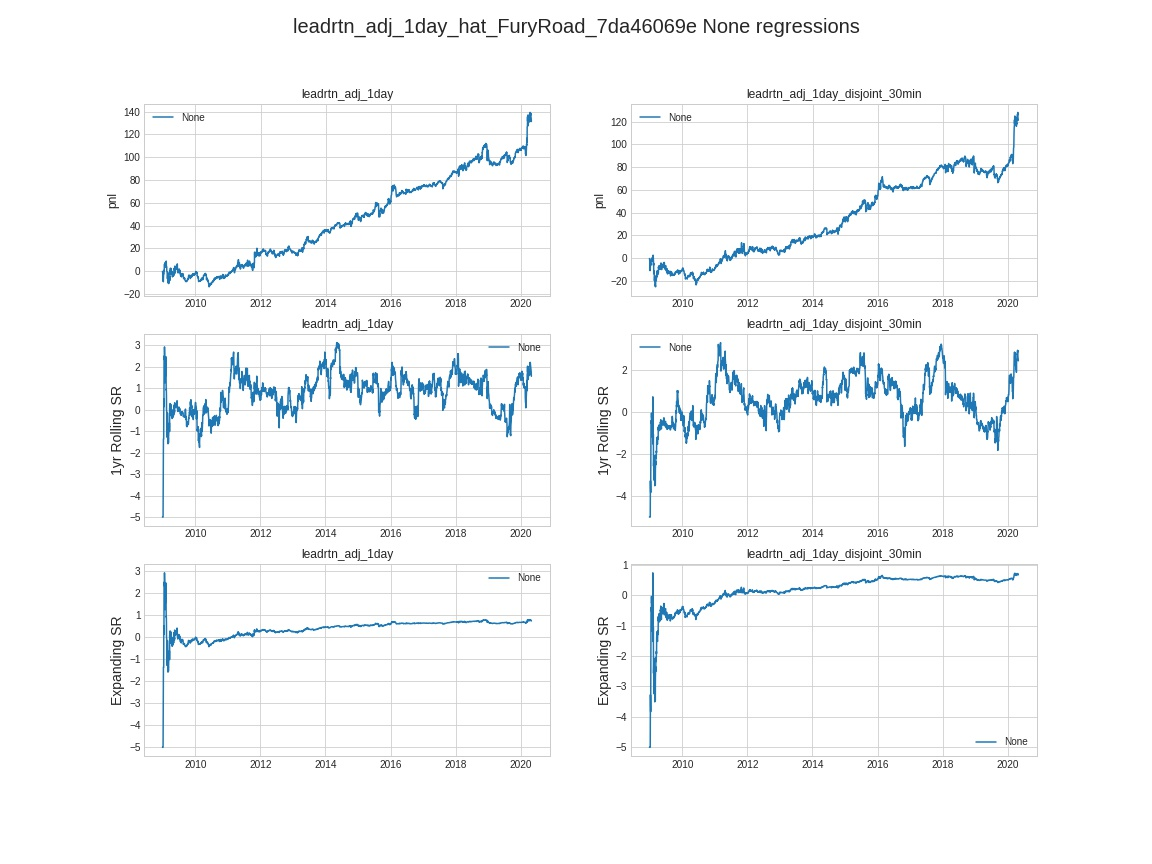

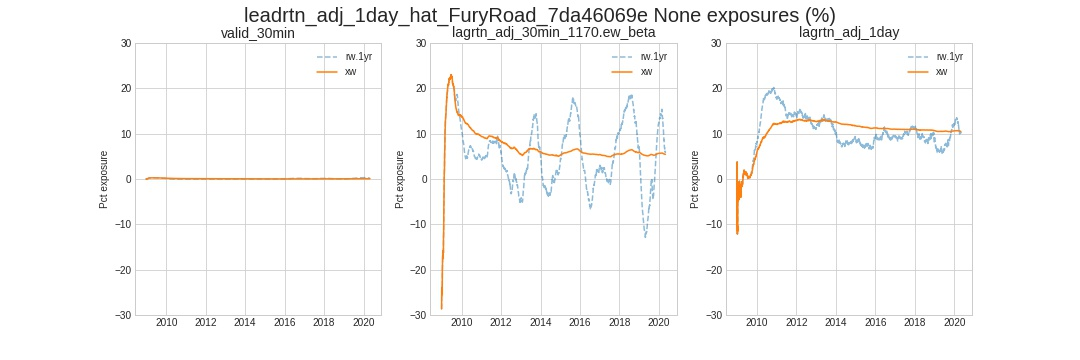

,0
leadrtn_adj_1day_hat_FuryRoad_7447511c0,fcst_0
leadrtn_adj_1day_hat_FuryRoad_7da46069e,fcst_1


,fcst_0,fcst_1
fcst_0,1.000000,0.968377
fcst_1,0.968377,1.000000


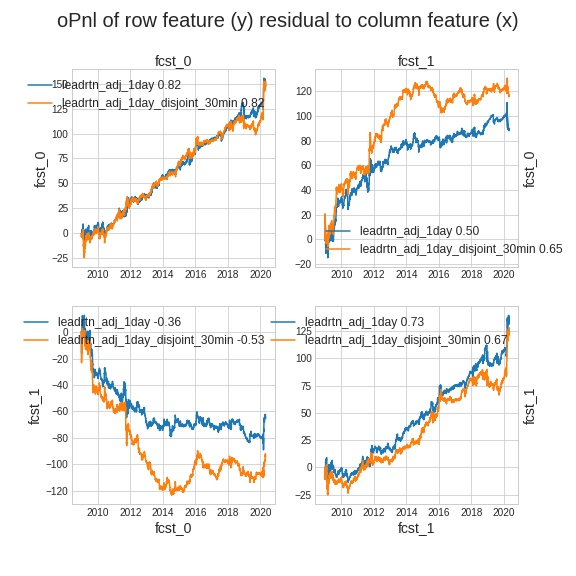

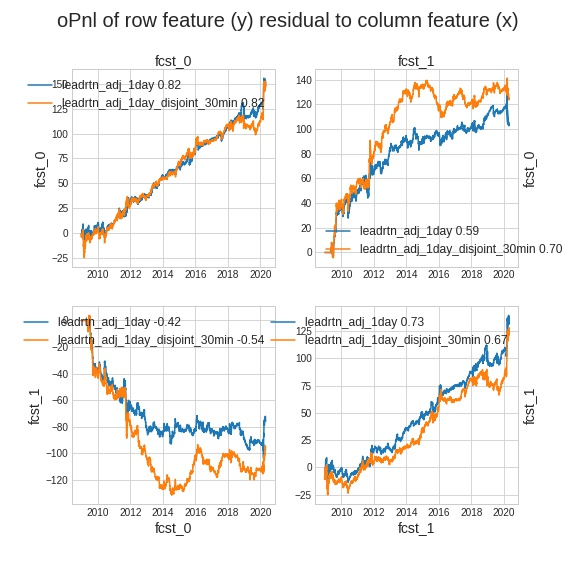

{'fcst_corrs':           fcst_0    fcst_1
 fcst_0  1.000000  0.968377
 fcst_1  0.968377  1.000000,
 'static_osrs': x                                         fcst_0    fcst_1
 y      tgt                                                
 fcst_0 leadrtn_adj_1day                 0.822051  0.500805
        leadrtn_adj_1day_disjoint_30min  0.815922  0.650741
 fcst_1 leadrtn_adj_1day                -0.363878  0.730385
        leadrtn_adj_1day_disjoint_30min -0.527502  0.674213,
 'static_autocorrs':             ac_1                ac_2          
 x         fcst_0    fcst_1    fcst_0    fcst_1
 y                                             
 fcst_0  0.635299  0.439138  0.635824  0.437986
 fcst_1  0.429649  0.589198  0.426340  0.585899,
 'static_opnl': <IPython.core.display.Image object>,
 'roll_osrs': x                                         fcst_0    fcst_1
 y      tgt                                                
 fcst_0 leadrtn_adj_1day                 0.822051  0.585101
        leadrtn_ad

In [11]:
# FuryRoad_7da46069e
####################################################################################
%inline

BASELINE_NAME = 'FuryRoad_7da46069e'
PREV_BASELINE = 'FuryRoad_7447511c0'
BASELINE_NOTES = 'furyroad with polyak averaging in the boosters (redo FuryRoad_f08613a5a) '
if PREV_BASELINE and BASELINE_NOTES:
    BASELINE_NOTES += f' (follows {PREV_BASELINE}) '
make_baseline = True

disp( BASELINE_NAME, h=1 )
disp( BASELINE_NOTES, h=3 )    

# set the input data
data = daily_data 

phps = mx.HPSet(
    # stuff related to pre and post processing
    start=hps.start,
    end=hps.end,  #
    # related to preprocessing
    preprocess=mx.HPSet(
        symbol=None,
        zscore_target=False, #zscore returns
        winsorize_target=False, #winsorize returns
        winsorize_features=None, # winsorize features
        demean_features=False,
        normalize_features=False,
        winsorize_weight=None, #winsorizes the learning weight (not the regression weight)
    ),        
    # hps related to profiling
    profiling=mx.HPSet(
        xsw=False,
        xsz=False,
        clip=None,
        exposures=(
            ['valid_30min', 'lagrtn_adj_30min_1170.ew_beta', 'lagrtn_adj_1day']         
        ),
        targets=['leadrtn_adj_1day', 'leadrtn_adj_1day_disjoint_30min' ],
        weight='valid_30min',
        
    ),
    # the feature sets
    features=sorted( set(
        []
        + ['open_unadj_30min_13.rw_mean', 'log_open_unadj_30min', 'open_unadj_30min' ]
        + hps.feature_set.lagging_daily
        + hps.feature_set.vol
        + hps.feature_set.log_volumes_daily
        # + hps.feature_set.calendar
        + hps.feature_set.mkt_daily
        + hps.feature_set.betas
        # + hps.feature_set.technical
        # + hps.feature_set.afacs                
    ) ),
    lookahead=2, #global lookahead
    targets=(
        []
        +['leadrtn_adj_1day'] 
    ),
    # feautres to orthogonal out
    ortho_features=(
        []                
        + ['valid_30min', 'lagrtn_adj_30min', 'lagrtn_adj_1day']  # tilt and mean revrsion        
        + hps.feature_set.betas # market
    ),
    weight='valid_30min',
    pre_transformer=None,
    post_transformer=None,
    batch_size=1000,  
    # ensembler hps
    ensembler=mx.HPSet(        
        ridge=1e-3,
        hl_1=None,
        hl_2=None,
        halflife_polyak=10,
        lr=1e-2,
        kappa=5,  # variance penalty
        halflife_kappa=20, # halflife for vraiance
        tv=None, #{1:1e-3, 2:1e-3, 13:1e-5},
        ortho=4,
        ortho_hl=13,        
        algo='eg',
        halflife_algo=None,
        use_omega=None,
        omega_lr=1,
        omega_ridge=None,
        omega_shift=0.01,
        pre_transformer=mx.HPSet( winsorize=0.05, pre_normalize=mx.HPSet( halflife=None, clip=3 ) ),
        post_transformer=mx.HPSet( winsorize=0.05, pre_normalize=mx.HPSet( halflife=None, clip=3 ) ),
    ),
    # the boosters
    boosters=[],    
)

booster_proto = mx.HPSet(        
    ridge=1e-3,
    hl_1=None,
    hl_2=None,
    halflife_polyak=10,
    kappa=3,  # variance penalty
    halflife_kappa=20, # halflife for vraiance
    tv=None, #{1:1e-3, 2:1e-3, 13:1e-5},
    ortho=4,
    ortho_hl=13,        
    lr=1e-3,
    algo='gd',
    halflife_algo=None,
    use_omega='P',
    omega_lr=1,
    omega_ridge=None,
    omega_shift=0.01,
    pre_transformer=mx.HPSet( winsorize=0.05, pre_normalize=mx.HPSet( halflife=None, clip=3 ), subset=False, hydra=False, transform='quadratic',  
                              post_normalize=mx.HPSet( halflife=None, clip=3), ema_halflifes=[13 * 5, 13 * 20, 13 * 40], ),
    post_transformer=mx.HPSet( winsorize=0.05, pre_normalize=mx.HPSet( halflife=None, clip=3 ) ),
)

booster_versions = [
    dict( kappa=3, lr=1e-4 ),
    dict( kappa=2, lr=1e-4 ),
    dict( kappa=4, lr=1e-4 ),
#     dict( use_omega='P', kappa=3, omega_lr=1, lr=1e-4 ),
#     dict( use_omega='P', kappa=2, omega_lr=1, lr=1e-4 ),
#     dict( use_omega='P', kappa=4, omega_lr=1, lr=1e-4 ),
]
for bv in booster_versions:
    phps.boosters.append( booster_proto.clone( **bv ) )

from research.etf_technical import furyroad_runner as frr; reload( frr )

# is this baselined  - then load from baseline cache
baseline = None
if BASELINE_NAME:
    try:
        baseline = mx.Baseline.load( BASELINE_NAME )
        assert baseline.hps == phps, 'failure to valdiate hyperparams'
        disp( 'loaded ',  BASELINE_NAME, ' from baseline cache', h=3, color='orange' )        
        output_meta = baseline.output_meta
        output_features = baseline.output_features
    except Exception as e:
        disp( 'did not find ', BASELINE_NAME, 'in baseline cache because ', e, '\n  running', h=3, color='purple' )
        
# run the runner if needed
if baseline is None:
    disp( mx.tensorboard.kill_server( ) )
    disp( mx.tensorboard.start( clear=True ) )    
    disp( mx.tensorboard.start_server( ) )
    runner = frr.run_pipeline( data, prev_baseline=PREV_BASELINE, hps=phps, memoize=True )
    disp( f'Expected {BASELINE_NAME}  got ', runner.name, h=4, color='teal' )
    runner.run()
    output_meta =  runner.output_meta
    output_features = runner.output_features
    # baseline this if needed
    if make_baseline:
        # let's give this fucker a name
        if not BASELINE_NAME: 
            BASELINE_NAME = runner.name 
        baseline = mx.Baseline.make( runner, hps=phps, notebook=Config.code,  notes=BASELINE_NOTES,  name=BASELINE_NAME   )
        disp( 'Baselined ', BASELINE_NAME, h=2, color='teal' )
    else:
        baseline = runner

# --- show the results---
for profile in output_meta['profiler']:
    main_fig = profile['main_fig']
    exp_fig = profile['exp_fig']
    reg_fig = profile['reg_fig'] 
    reg_df = profile['regressions']
    if not reg_df.empty: reg_df = reg_df.set_index( ['returns', 'lag'] )
    disp( profile['feature'],  h=3, hr=True )    
    disp( 'Regressions', reg_df, h=4 )
    disp( reg_fig  )
    disp( exp_fig )
    
# compare this with other forecasts in the same dataarray if needed ...
comparator = mx.ForecastComparator( targets=phps.profiling.targets, weight=phps.profiling.weight, winlen=100 )
comparator.compare( baseline )